# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function (allora è un piccione viaggiatore, perchè vola tra le città):

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

### Exercise 09.1

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis, i chose the second option:
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">The first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators.

Nota: tanti tipi di mutazioni = muoversi meglio in modo più ergodico sulle possibili soluzioni >> miglior efficienza (velocità, convergenza).

Nota: un incrocio nella soluzione finale è quasi sempre indice di risultato non ancora raggiunto.

Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort (vale anche se sono separati!):
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

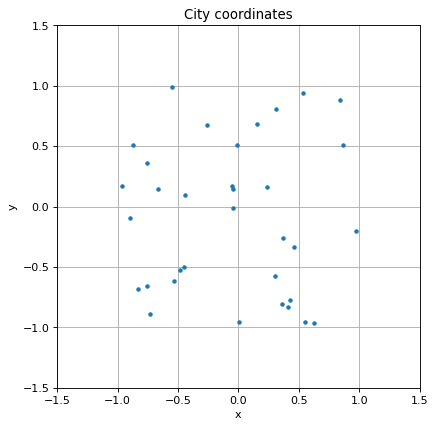

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

x,y = np.loadtxt("ex9/cit/0citycoord.out", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x, y, marker = ".", linestyle = "none") 

plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)
#plt.axhline(y=-0.46, color = 'r', linestyle = '-')
plt.title('City coordinates')
#plt.legend()

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [27]:
from time import pthread_getcpuclockid
from turtle import shape
from wsgiref.util import shift_path_info
import matplotlib
import matplotlib.pyplot as plt
from requests import PreparedRequest
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
import imageio
import sys

C=0

print("Generating image number:")

gen,best = np.loadtxt("ex9/bestLen/BL.out", usecols=(0,1), delimiter=' ', unpack='true')

X,Y = np.loadtxt("ex9/cit/1citycoord.out",  usecols=(0,1), delimiter=' ', unpack='true')
Best = 500

fig=plt.figure(figsize=(5, 5))
filenames=[]
N=(X.size)

for j in range(0,Best):

    X,Y = np.loadtxt("ex9/cit/"+str(j)+"citycoord.out",  usecols=(0,1), delimiter=' ', unpack='true')
    fig=plt.figure(figsize=(8, 8))

    plt.plot(X,Y, label = "Generation "+str(j)+", Lenght ="+str(best[j]))  
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.ylim([-1.5, 1.5])
    plt.xlim([-1.5, 1.5])
    plt.grid(True)
    plt.legend()
    if j%10 == 0:
        print(j, end = ", ")
    plt.savefig("ex9/imgs/%s.png"%j,format="png", dpi=150)
    filenames.append("ex9/imgs/%s.png"%j)
    plt.close(fig)

with imageio.get_writer('ex9/movie.gif', mode='I') as writer:
    i = 0
    print("\nGenerating GIF: ")
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        i = i+1
        if i%10 == 0:
            print(i, end = ", ")

print("\nEND")

Generating image number:
0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 
Generating GIF: 
10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 
END


<Figure size 360x360 with 0 Axes>

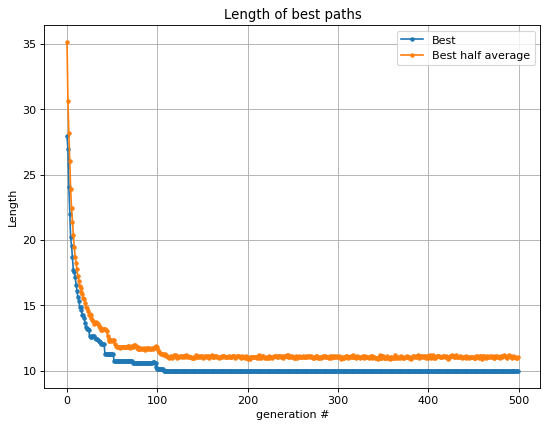

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

gen,best = np.loadtxt("ex9/bestLen/BL.out", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(gen, best, marker = ".", label = "Best") 

bestave = np.loadtxt("ex9/bestLen/BLAv.out", usecols=(1), delimiter=' ', unpack='true')
plt.plot(gen, bestave, marker = ".", label = "Best half average") 

plt.ylabel('Length')
plt.xlabel('generation #')
plt.grid(True)
#plt.axhline(y=-0.46, color = 'r', linestyle = '-')
plt.title('Length of best paths')

plt.legend()
plt.show()